# Task 1: Basic statistics

For this task, I initially created dataframe with columns Outdoor_temp and Supply_temp with the DataFrame function of the pandas library. Then, I calculated means of both these columns by calling the mean function from the statistics library. Then, I calculated the statistical formula need to calcualte and add to seperate dataframes. Then, I merged all the calculated dataframes to form a table, with the concat function from the pandas library.

Then, I calculated the Covariance with the formula,

Covariance = sum((y - mean(y)) * (x - mean(x))) / (Number of rows - 1)

To get the number of rows, I used the shape function of the dataset.

Finaly, I printed the means of each variable, Outdoor_temp and Supply_temp. Also, the covariance of the Outdoor_temp and Supply_temp. Finally, the whole dataset with the result I got.

In [441]:
# Imported libraries
import pandas as pd
from statistics import mean

# Created DataFrame
df = pd.DataFrame({'Outdoor_temp':[7.8,7.3,2.7,2.0,2.9,3.7,4.1,4.3,4.4,4.3,5.7,4.6,7.5,9.6],
                   'Supply_temp':[32.1,32.6,37.4,38.3,37.3,36.5,36.1,35.8,35.7,35.7,34.4,35.5,32.4,30.2]})

# Made index of the dataframe starts with 1
df.index = df.index + 1

# Columns Outdoor_temp and Supply_temp are assigned with variables x and y respectively
x = df.iloc[:,0]
y = df.iloc[:,1]

# Calculated means of columns x and y
mean_x = mean(x)
mean_y = mean(y)
print("Mean of Outdoor_temp is", mean_x, "and mean of Supply_temp is", mean_y, "\n")

# Create the data frames of each statistical formulas
df1 = pd.DataFrame({'(y - ymean)': y - mean_y})
df2 = pd.DataFrame({'(x - xmean)': x - mean_x})
df3 = pd.DataFrame({'(y - ymean)^2': (y - mean_y) ** 2})
df4 = pd.DataFrame({'(x - xmean)^2': (x - mean_x) ** 2})
df5 = pd.DataFrame({'(y - ymean)(x - xmean)': (y - mean_y) * (x - mean_x)})

# Merge all the data frames
df_Stats = pd.concat([df,df1,df2,df3,df4,df5], axis=1, join='inner')

# Calculate and print covariance of x and y
print("Covariance of Outdoor_temp and Supply_temp is", ((y - mean_y) * (x - mean_x)).sum()/(df_Stats.shape[0] - 1), "\n")

# Print all the statistical results
print(df_Stats)

Mean of Outdoor_temp is 5.064285714285714 and mean of Supply_temp is 35.0 

Covariance of Outdoor_temp and Supply_temp is -5.192307692307692 

    Outdoor_temp  Supply_temp  (y - ymean)  (x - xmean)  (y - ymean)^2  \
1            7.8         32.1         -2.9     2.735714           8.41   
2            7.3         32.6         -2.4     2.235714           5.76   
3            2.7         37.4          2.4    -2.364286           5.76   
4            2.0         38.3          3.3    -3.064286          10.89   
5            2.9         37.3          2.3    -2.164286           5.29   
6            3.7         36.5          1.5    -1.364286           2.25   
7            4.1         36.1          1.1    -0.964286           1.21   
8            4.3         35.8          0.8    -0.764286           0.64   
9            4.4         35.7          0.7    -0.664286           0.49   
10           4.3         35.7          0.7    -0.764286           0.49   
11           5.7         34.4         -0.6 

# Task 2: Linear Regression

# Data Exploration

At first, I imported the advertising dataset and given the first column name 'No.', which was null.

In [442]:
# Imported libraries
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score
from math import sqrt
import seaborn as sb

In [443]:
# Imported advertising dataset
advertising_df = pd.read_csv("Advertising.csv")

In [444]:
# First column name was null. Renamed column name to 'No.'
advertising_df.rename(columns={advertising_df.columns[0]: 'No.'}, inplace=True)

In [445]:
# Find number of rows and columns of the dataset
print(advertising_df.shape)

(200, 5)


There are 200 rows and 5 columns in the dataset. Now, we will get the first 5 rows using the head function.

In [446]:
# Get first rows of the dataset
advertising_df.head()

,No.,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [447]:
# Get column datatypes and check for null values
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No.        200 non-null    int64  
 1   TV         200 non-null    float64
 2   radio      200 non-null    float64
 3   newspaper  200 non-null    float64
 4   sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


After running the info function we got the data types of the columns and all 5 columns have Non-Null Count 200. That means, there is no missing values. We can confirm this by running 'advertising_df.isnull().sum()' function.

In [448]:
# Check for null values
advertising_df.isnull().sum()

No.          0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Here it is confirmed that, there is no missing values. Now, I am checking for duplicate values.

In [449]:
# Check for duplicates
advertising_df[advertising_df.duplicated(keep=False)]

,No.,TV,radio,newspaper,sales


Here it is confirmed that, there is no duplicate values. Now, I called the describe function to get the statistical distribution of the dataset.

In [450]:
# Get the statistical distributions of the dataset
advertising_df.describe()

,No.,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


I called here the corr function to get the correlation of the features. Then, plotted the correlation in the heatmap.

In [451]:
# Get the correlation
corr = advertising_df.corr()
corr

,No.,TV,radio,newspaper,sales
No.,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


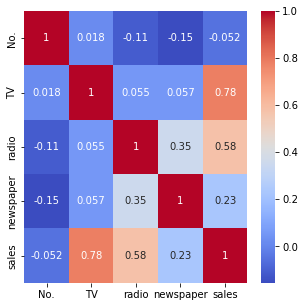

In [452]:
# Plotting the correlation in heatmap
plt.figure(figsize=(5, 5))

sb.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

After getting the heatmap of the correlation, we can see that, the feature 'TV' has strong positive correlation with the feature 'sales'. The feature 'radio' has significant positive correlation with the feature 'sales'. The feature 'newspaper' has very little correlation with the feature 'sales'.

# Univariate Linear Regression

Here, I am doing Univariate Linear Regression for the independent variable 'TV' with the target variable 'sales'. Then, with the independent variable 'radio' with the target variable 'sales'. Finally, with the independent variable 'newspaper' with the target variable 'sales'

# Calculate Univariate linear regression for TV advertisement with target variable sales

Text(0, 0.5, 'Sales')

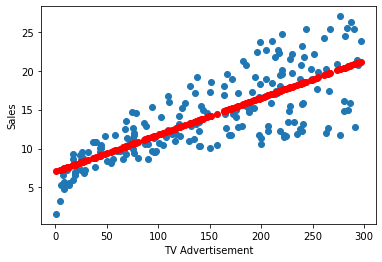

In [453]:
# Created object of LinearRegression
clf = LinearRegression()

# Independent variable TV is assigned as x
x = advertising_df['TV']

# Dependent variable (Target variable) sales is assigned as y
y = advertising_df['sales']

# Converting variable x to 2D
x = np.array(x).reshape(-1, 1)


# Created linear regression with variables x and y
clf.fit(x, y)

# Predict the sales value with the linear regression model
y_pred = clf.predict(x)

# Plot the scatter plot for the linear regression model 
plt.scatter(x, y)
plt.scatter(x, y_pred, color = 'red')
plt.xlabel('TV Advertisement')
plt.ylabel('Sales')

After running and plotting the linear regression, I got the plot as shown above. Here, the blue colored data points are the actual data points and the red data points are the predicted ones.

# Evaluation of the model of Univariate linear regression for TV advertisement with target variable sales

I am going to evaluate the model, with R2 score (Coefficient of determination), Residual Sum of Squares (RSS), Mean Squared Error (MSE), Mean Absolute Error, Median Absolute Error, Root mean squared error (RMSE) and Explained variance score. At first I am defining the functions for the evaluation of the model, which I can use in the evaluation of all 3 Univariate linear regression models and the Multivariate regression model.

In [454]:
# Function definition to calculate Residual Sum of Squares
def rss_score(y, y_pred):
    return np.sum((y - y_pred)**2)

# Function definition to calculate error by datapoint
def calc_error(y, y_pred):
    return y - y_pred

# Function definition to calculate total error
def total_error(y, y_pred):
    return np.sum(abs(y - y_pred))

# Function definition to calculate Root mean squared error (RMSE)
def root_mean_squared_error(y, y_pred):
    return sqrt((1 / len(y)) * np.sum((y - y_pred)**2))

In [455]:
# Predict the value of sales, when the advertisement for TV is 286.0
y_pred1 = clf.predict([[286.0]])

# Get the actual value of sales, when the advertisement for TV is 286.0
y1 = advertising_df['sales'].where(advertising_df['TV'] == 286.0)
y1 = y1.dropna()

# Calculate the error, when the advertisement for TV is 286.0
print("Error when the advertisement for TV is 286.0 is", calc_error(np.sum(y1.dropna())/y1.shape, y_pred1))

# Calculate total Error between regression line and data points
print("Total Error between regression line and data points is", total_error(y, y_pred))

# Calculate R2 (Coefficient of determination)
print("R2 score of the linear regression model is", r2_score(y, y_pred))

# Calculate Residual Sum of Squares (RSS)
print("Residual Sum of Squares (RSS) of the linear regression model is", rss_score(y, y_pred))

# Calculate Mean Squared Error (MSE)
print("Mean Squared Error (MSE) of the linear regression model is", mean_squared_error(y, y_pred))

# Calculate Mean Absolute Error
print("Mean Absolute Error of the linear regression model is", mean_absolute_error(y, y_pred))

# Calculate Median Absolute Error
print("Median Absolute Error of the linear regression model is", median_absolute_error(y, y_pred))

# Calculate Root mean squared error (RMSE)
print("Root mean squared error (RMSE) of the linear regression model is", root_mean_squared_error(y, y_pred))

# Calculate Explained variance score
print("Explained variance score of the linear regression model is", explained_variance_score(y, y_pred))

Error when the advertisement for TV is 286.0 is [-4.72807271]
Total Error between regression line and data points is 509.9612077854972
R2 score of the linear regression model is 0.611875050850071
Residual Sum of Squares (RSS) of the linear regression model is 2102.5305831313517
Mean Squared Error (MSE) of the linear regression model is 10.512652915656759
Mean Absolute Error of the linear regression model is 2.549806038927486
Median Absolute Error of the linear regression model is 2.0263647272887875
Root mean squared error (RMSE) of the linear regression model is 3.2423221486546887
Explained variance score of the linear regression model is 0.611875050850071


Here, I got the error when the advertisement for TV is 286.0 is -4.72807271. And the total error between regression line and data points is 509.9612077854972. R2 score of the model is 0.611875050850071. And all other errors can be see in the results, we got above.

# Calculate Univariate linear regression for Radio advertisement with target variable sales

Text(0, 0.5, 'Sales')

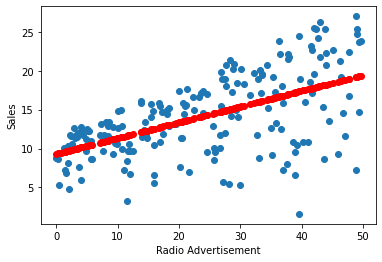

In [456]:
# Created object of LinearRegression
clf = LinearRegression()

# Independent variable radio is assigned as x
x = advertising_df['radio']

# Dependent variable (Target variable) sales is assigned as y
y = advertising_df['sales']

# Converting variable x to 2D
x = np.array(x).reshape(-1, 1)

# Created linear regression with variables x and y
clf.fit(x, y)

# Predict the sales value with the linear regression model
y_pred = clf.predict(x)

# Plot the scatter plot for the linear regression model 
plt.scatter(x, y)
plt.scatter(x, y_pred, color = 'red')
plt.xlabel('Radio Advertisement')
plt.ylabel('Sales')

# Evaluation of the model of Univariate linear regression for Radio advertisement with target variable sales

In [457]:
# Predict the value of sales, when the advertisement for radio is 13.9
y_pred1 = clf.predict([[13.9]])

# Get the actual value of sales, when the advertisement for radio is 13.9
y1 = advertising_df['sales'].where(advertising_df['radio'] == 13.9)
y1 = y1.dropna()

# Calculate the error, when the advertisement for radio is 13.9
print("Error when the advertisement for radio is 13.9 is", calc_error(np.sum(y1.dropna())/y1.shape, y_pred1))

# Calculate total Error between regression line and data points
print("Total Error between regression line and data points is", total_error(y, y_pred))

# Calculate R2 (Coefficient of determination)
print("R2 score of the linear regression model is", r2_score(y, y_pred))

# Calculate Residual Sum of Squares (RSS)
print("Residual Sum of Squares (RSS) of the linear regression model is", rss_score(y, y_pred))

# Calculate Mean Squared Error (MSE)
print("Mean Squared Error (MSE) of the linear regression model is", mean_squared_error(y, y_pred))

# Calculate Mean Absolute Error
print("Mean Absolute Error of the linear regression model is", mean_absolute_error(y, y_pred))

# Calculate Median Absolute Error
print("Median Absolute Error of the linear regression model is", median_absolute_error(y, y_pred))

# Calculate Root mean squared error (RMSE)
print("Root mean squared error (RMSE) of the linear regression model is", root_mean_squared_error(y, y_pred))

# Calculate Explained variance score
print("Explained variance score of the linear regression model is", explained_variance_score(y, y_pred))

Error when the advertisement for radio is 13.9 is [3.87367052]
Total Error between regression line and data points is 664.0437595284133
R2 score of the linear regression model is 0.33203245544529525
Residual Sum of Squares (RSS) of the linear regression model is 3618.479549025088
Mean Squared Error (MSE) of the linear regression model is 18.09239774512544
Mean Absolute Error of the linear regression model is 3.3202187976420663
Median Absolute Error of the linear regression model is 2.6141696723652945
Root mean squared error (RMSE) of the linear regression model is 4.253515927456419
Explained variance score of the linear regression model is 0.33203245544529547


Here, I got the error when the advertisement for radio is 13.9 is 3.87367052. And the total error between regression line and data points is 664.0437595284133. R2 score of the model is 0.33203245544529525. And all other errors can be see in the results, we got above.

# Calculate Univariate linear regression for newspaper advertisement with target variable sales

Text(0, 0.5, 'Sales')

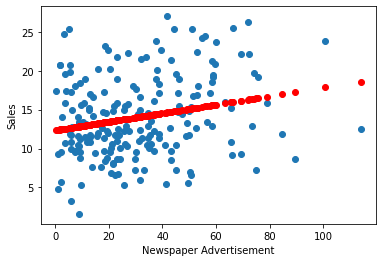

In [458]:
# Created object of LinearRegression
clf = LinearRegression()

# Independent variable newspaper is assigned as x
x = advertising_df['newspaper']

# Dependent variable (Target variable) sales is assigned as y
y = advertising_df['sales']

# Converting variable x to 2D
x = np.array(x).reshape(-1, 1)

# Created linear regression with variables x and y
clf.fit(x, y)

# Predict the sales value with the linear regression model
y_pred = clf.predict(x)

# Plot the scatter plot for the linear regression model 
plt.scatter(x, y)
plt.scatter(x, y_pred, color = 'red')
plt.xlabel('Newspaper Advertisement')
plt.ylabel('Sales')

Here, we can see lots of errors in the plot we got above. Now, I am going to evaluate the model

# Evaluation of the model of Univariate linear regression for Newspaper advertisement with target variable sales

In [459]:
# Calculate total Error between regression line and data points
print("Total Error between regression line and data points is", total_error(y, y_pred))

# Calculate R2 (Coefficient of determination)
print("R2 score of the linear regression model is", r2_score(y, y_pred))

# Calculate Residual Sum of Squares (RSS)
print("Residual Sum of Squares (RSS) of the linear regression model is", rss_score(y, y_pred))

# Calculate Mean Squared Error (MSE)
print("Mean Squared Error (MSE) of the linear regression model is", mean_squared_error(y, y_pred))

# Calculate Mean Absolute Error
print("Mean Absolute Error of the linear regression model is", mean_absolute_error(y, y_pred))

# Calculate Median Absolute Error
print("Median Absolute Error of the linear regression model is", median_absolute_error(y, y_pred))

# Calculate Root mean squared error (RMSE)
print("Root mean squared error (RMSE) of the linear regression model is", root_mean_squared_error(y, y_pred))

# Calculate Explained variance score
print("Explained variance score of the linear regression model is", explained_variance_score(y, y_pred))

Total Error between regression line and data points is 829.3119487676976
R2 score of the linear regression model is 0.05212044544430516
Residual Sum of Squares (RSS) of the linear regression model is 5134.804544111939
Mean Squared Error (MSE) of the linear regression model is 25.674022720559698
Mean Absolute Error of the linear regression model is 4.146559743838488
Median Absolute Error of the linear regression model is 3.440420731010449
Root mean squared error (RMSE) of the linear regression model is 5.066953988399707
Explained variance score of the linear regression model is 0.05212044544430516


Here we can see, the total error between regression line and data points is 829.3119487676976. R2 score of the model is 0.05212044544430516. And all other errors can be see in the results, we got above.

# Multivariate Regression Model

Here, I am doing Multivariate Regression Model with independent variables TV, radio and newspaper. The dependent (target) variable is sales. For getting the independent variables, I am using the drop function of the dataset and dropped variables 'No.' and 'sales' and assigned to variable x. The target variable is 'sales', which is assigned to variable y. Then, I split the dataset into train and test data sets with 20% test data and 80% train samples, using the train_test_split function from the sklearn library. Then, fit the model with train dataset and predicted the model with both the train and test datasets. Then, I plotted the scatter plot for 'Actual Sales vs Predicted Sales'. 

The intercept is 2.99489303049533
The coefficients are [ 0.04458402  0.19649703 -0.00278146]


Text(0.5, 1.0, 'Actual vs Predicted Sales (Train)')

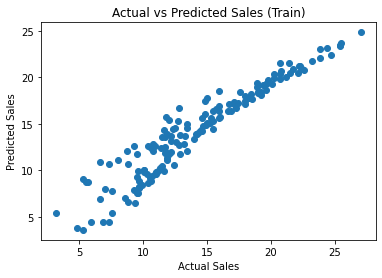

In [460]:
# Import libraried
from sklearn.model_selection import train_test_split

# Created object of LinearRegression
clf = LinearRegression()

# Dropped columns No. and sales from the dataframe and assigned as x
x = advertising_df.drop(['No.','sales'], axis=1)

# Dependent variable (Target variable) sales is assigned as y
y = advertising_df['sales']

# Creating test and training samples from the dataset with 20% test samples and 80% train samples
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Linear regression model is trained with training data x_train and y_train
clf.fit(x_train, y_train)

#Print the intercept and the coefficients
print("The intercept is", clf.intercept_)
print("The coefficients are", clf.coef_)

# Predict the sales value with the linear regression model by passing the training data
y_pred_train = clf.predict(x_train)

# Plot the scatter plot for the Actual Sales vs Predicted Sales
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title("Actual vs Predicted Sales (Train)")

After running the Multivariate Regression and predicting with training data, I got the intercept and the coefficients for TV, radio and newspaper. Above, we can see the scatter plot of Actual Sales vs Predicted Sales with the model predicted with the training data. We can see Actual Sales and Predcited Sales is almost same, which will cause overfitting. So, I am doing the model prediction with the testing dataset.

# Evaluation of the model of  Multivariate Regression with the training data

In [461]:
# Calculate total Error between regression line and data points
print("Total Error between regression line and data points is", total_error(y_train, y_pred_train))

# Calculate R2 (Coefficient of determination)
print("R2 score of the multivariate regression model is", r2_score(y_train, y_pred_train))

# Calculate Residual Sum of Squares (RSS)
print("Residual Sum of Squares (RSS) of the multivariate regression model is", rss_score(y_train, y_pred_train))

# Calculate Mean Squared Error (MSE)
print("Mean Squared Error (MSE) of the multivariate regression model is", mean_squared_error(y_train, y_pred_train))

# Calculate Mean Absolute Error
print("Mean Absolute Error of the multivariate regression model is", mean_absolute_error(y_train, y_pred_train))

# Calculate Median Absolute Error
print("Median Absolute Error of the multivariate regression model is", median_absolute_error(y_train, y_pred_train))

# Calculate Root mean squared error (RMSE)
print("Root mean squared error (RMSE) of the multivariate regression model is", root_mean_squared_error(y_train, y_pred_train))

# Calculate Explained variance score
print("Explained variance score of the multivariate regression model is", explained_variance_score(y_train, y_pred_train))

Total Error between regression line and data points is 194.10994596367084
R2 score of the multivariate regression model is 0.9067114990146383
Residual Sum of Squares (RSS) of the multivariate regression model is 385.090360931025
Mean Squared Error (MSE) of the multivariate regression model is 2.406814755818906
Mean Absolute Error of the multivariate regression model is 1.2131871622729427
Median Absolute Error of the multivariate regression model is 1.0165018045396073
Root mean squared error (RMSE) of the multivariate regression model is 1.5513912323520802
Explained variance score of the multivariate regression model is 0.9067114990146383


Here we can see, the total error between regression line and data points is 194.10994596367084. R2 score of the model is 0.9067114990146383. And all other errors can be see in the results, we got above.

# Test the model with the test data

Now, I am testing the model with the test data.

Text(0.5, 1.0, 'Actual vs Predicted Sales (Test)')

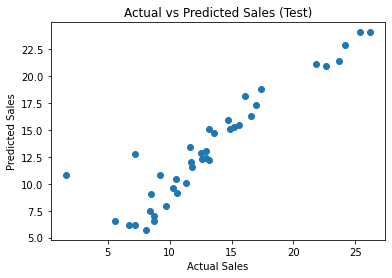

In [462]:
# Predict the sales value with the linear regression model by passing the testing data
y_pred_test = clf.predict(x_test)

# Plot the scatter plot for the Actual Sales vs Predicted Sales
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title("Actual vs Predicted Sales (Test)")

Above, we can see the scatter plot of Actual Sales vs Predicted Sales with the model predicted with the testing data

# Evaluation of the model of  Multivariate Regression with the testing data

In [463]:
# Calculate total Error between regression line and data points
print("Total Error between regression line and data points is", total_error(y_test, y_pred_test))

# Calculate R2 (Coefficient of determination)
print("R2 score of the multivariate regression model is", r2_score(y_test, y_pred_test))

# Calculate Residual Sum of Squares (RSS)
print("Residual Sum of Squares (RSS) of the multivariate regression model is", rss_score(y_test, y_pred_test))

# Calculate Mean Squared Error (MSE)
print("Mean Squared Error (MSE) of the multivariate regression model is", mean_squared_error(y_test, y_pred_test))

# Calculate Mean Absolute Error
print("Mean Absolute Error of the multivariate regression model is", mean_absolute_error(y_test, y_pred_test))

# Calculate Median Absolute Error
print("Median Absolute Error of the multivariate regression model is", median_absolute_error(y_test, y_pred_test))

# Calculate Root mean squared error (RMSE)
print("Root mean squared error (RMSE) of the multivariate regression model is", root_mean_squared_error(y_test, y_pred_test))

# Calculate Explained variance score
print("Explained variance score of the multivariate regression model is", explained_variance_score(y_test, y_pred_test))

Total Error between regression line and data points is 54.4712540083611
R2 score of the multivariate regression model is 0.8601145185017868
Residual Sum of Squares (RSS) of the multivariate regression model is 176.0847316579874
Mean Squared Error (MSE) of the multivariate regression model is 4.402118291449685
Mean Absolute Error of the multivariate regression model is 1.3617813502090275
Median Absolute Error of the multivariate regression model is 1.0582843863446056
Root mean squared error (RMSE) of the multivariate regression model is 2.0981225634956804
Explained variance score of the multivariate regression model is 0.8602806474273638


Here we can see, the total error between regression line and data points is 54.4712540083611. R2 score of the model is 0.8601145185017868. And all other errors can be see in the results, we got above.

# Task 3: Clustering

Here, I am creating the Clustering models with K-Means, DBSCAN, Hierarchical Clustering and BIRCH and evaluating these models with different parameters.

# Data Exploration

Initially, I imported Boston Housing dataset with '\s+' as seperator and header value is None. Then, I added the respective column names to the dataset. After that, I done the exploration of the dataset.

In [464]:
# Imported libraries
import seaborn as sns

# Imported housing dataset
housing_df = pd.read_csv('housing.csv', sep='\s+', header=None)

# Added column headers
housing_df.columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]

# Find number of rows and columns of the dataset
print(housing_df.shape)

(506, 14)


After running the shape function of the dataset, we can see that the dataset has 506 rows and 14 columns. Then, I checked the first 5 rows of the dataset by running the head function of the dataset.

In [465]:
# Get first rows of the dataset
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [466]:
# Get column datatypes and check for null values
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


After running the info function we got the data types of the columns and all 14 columns have Non-Null Count 506. That means, there is no missing values. We can confirm this by running 'housing_df.isnull().sum()' function.

In [467]:
# Check for null values
housing_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Here it is confirmed that, there is no missing values. Now, I am checking for duplicate values.

In [468]:
# Check for duplicates
housing_df[housing_df.duplicated(keep=False)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


Here it is confirmed that, there is no duplicate values. Now, I called the describe function to get the statistical distribution of the dataset.

In [469]:
# Get the statistical distributions of the dataset
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


After running the describe function we got the minimum value, maximum value, mean, median, standard deviation, 1st quantile and 3rd quantile of each and every columns of the dataset. If we compare all these statistical formulas for each columns we can see there are outliers in some of the columns. For example, maximum value 88.976200 for the column CRIM is an outlier. Now, I am going to plot boxplot to check the outliers for all the columns.

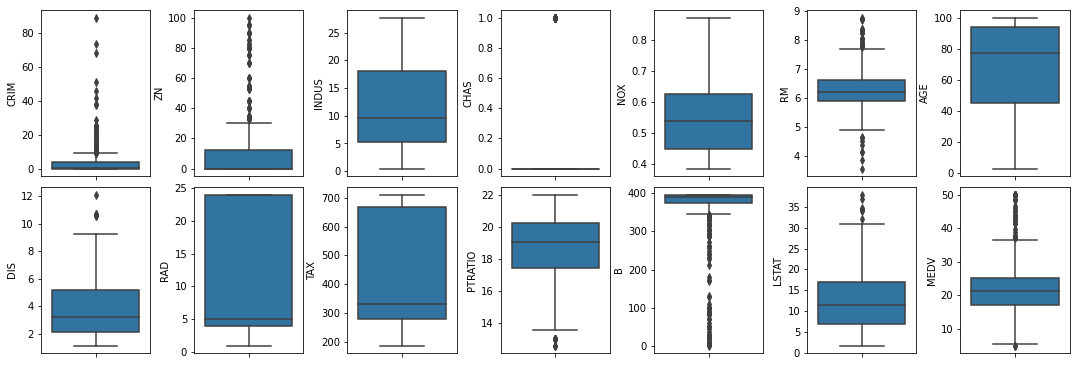

In [470]:
# Outlier detection with the boxplot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0

for i in housing_df.columns:
  sns.boxplot(y=i, data=housing_df, ax=ax[index])
  index +=1
plt.tight_layout(pad=0.4)
plt.show()

From the above boxplot, we can see data points below the 1st quantile and the data points above the 3rd quantile are outliers. Now, I am going to check the amount of outliers by feature.

In [471]:
# Checking outliers by features
for i in housing_df.columns:
  housing_df.sort_values(by=i, ascending=True, na_position='last')
  q1, q3 = np.nanpercentile(housing_df[i], [25,75])
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  outlier_data = housing_df[i][(housing_df[i] < lower_bound) | (housing_df[i] > upper_bound)] #creating a series of outlier data
  perc = (outlier_data.count()/housing_df[i].count())*100
  print('Outliers in %s is %.2f%% with count %.f' %(i, perc, outlier_data.count()))

Outliers in CRIM is 13.04% with count 66
Outliers in ZN is 13.44% with count 68
Outliers in INDUS is 0.00% with count 0
Outliers in CHAS is 6.92% with count 35
Outliers in NOX is 0.00% with count 0
Outliers in RM is 5.93% with count 30
Outliers in AGE is 0.00% with count 0
Outliers in DIS is 0.99% with count 5
Outliers in RAD is 0.00% with count 0
Outliers in TAX is 0.00% with count 0
Outliers in PTRATIO is 2.96% with count 15
Outliers in B is 15.22% with count 77
Outliers in LSTAT is 1.38% with count 7
Outliers in MEDV is 7.91% with count 40


Here, we can see the feature 'B' has most outliers with 15.2% followed by the feature 'ZN' with 13.44%. Features 'INDUS', 'NOX', 'AGE', 'RAD' and 'TAX' don't have outliers at all. Now, I am calling the corr function to get the correlation of the features. Then, plotted the correlation in the heatmap.

In [472]:
# Get the correlation
corr = housing_df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


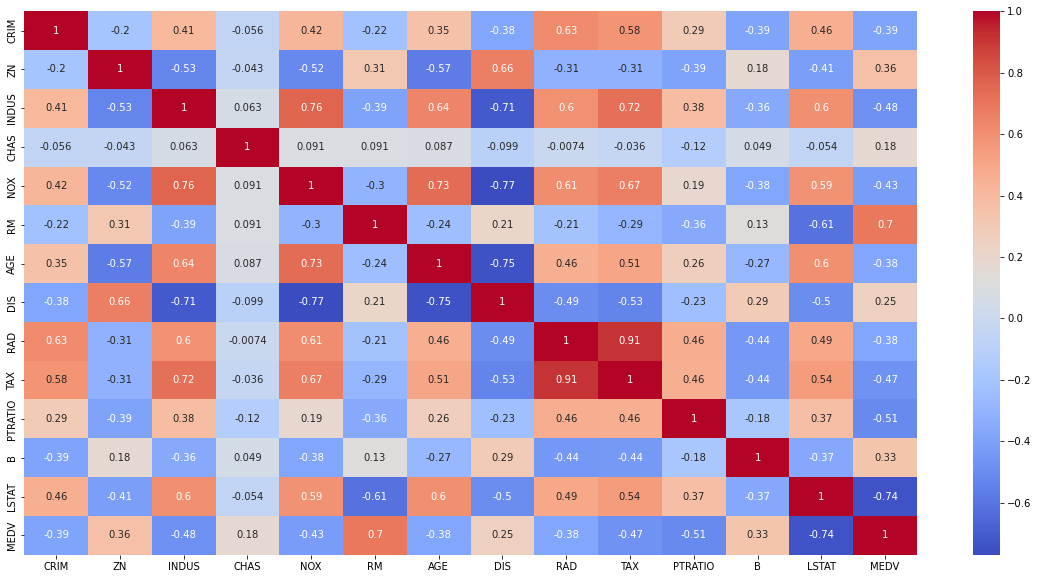

In [473]:
# Plotting the correlation in heatmap
plt.figure(figsize=(20, 10))

sb.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

After getting the heatmap of the correlation, we can see that, the feature 'TAX' has strong positive correlation with the feature 'RAD'. The feature 'DIS' has significant negative correlation with the features 'NOX', 'AGE' and 'INDUS'. Also, the feature 'LSTAT' has significant negative correlation with the feature 'MEDV'. We can see the correlation of every features each other in the heat map.

# K-means Clustering

I am doing clustering for all models with the features 'LSTAT' and 'MEDV'. Initially, I extracted these 2 features into dataset data_X. And this data_X is used in all the four clustering models. Before starting the K-means clustering to get the best k value, I am using the Elbow plot.

# Elbow plot to find the k value for the number of clusters

In [474]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

# Get the values of the feature LSTAT and MEDV for all the clustering models
data_X = housing_df.iloc[:,[12, 13]].values

# Compute the SSE (Sum of Squared Errors)
sse = []
k_range = range(1,11)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(data_X)
    sse.append(km.inertia_)
sse

C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[68468.64896699604,
 33002.335469253936,
 16696.213342254665,
 11695.827374824674,
 8101.153579250988,
 6462.371610189381,
 5688.138632940464,
 5065.5857644457765,
 4527.401846359797,
 4070.8632527482987]

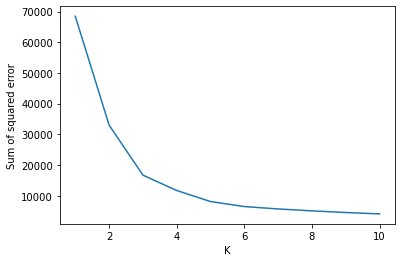

In [475]:
# Plot the result of SSE
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

From the Elbow plot, we got above we can see that best value of k for K-Means clustering is 3. Now, I am plotting our features 'LSTAT' and 'MEDV' before clustering.

Text(0, 0.5, 'MEDV')

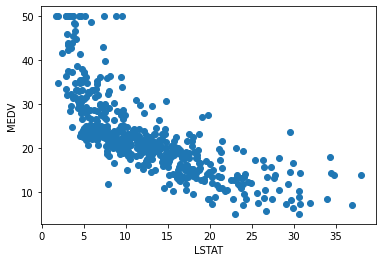

In [476]:
# Plot the scatter plot
plt.scatter(housing_df['LSTAT'], housing_df['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

Now, I run the K-means clustering with No of clusters 3 and predicted the cluster. Then, created the feature cluster in the dataset, to update the cluster we got.

In [477]:
# Run K-means algorithm with k=3 which we got from elbow plot
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data_X)
y_predicted

array([0, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [478]:
# Created new column for cluster
housing_df['cluster'] = y_predicted
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,cluster
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,2
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,2
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,2


In [479]:
# Get the cluster centers
km.cluster_centers_

array([[10.39878049, 22.19512195],
       [21.93746377, 13.5173913 ],
       [ 4.82259259, 39.08888889]])

Here, we got the centroids of each of the 3 clusters. Then, I am plotting the result I got in the scatter plot with different colors for different clusters.

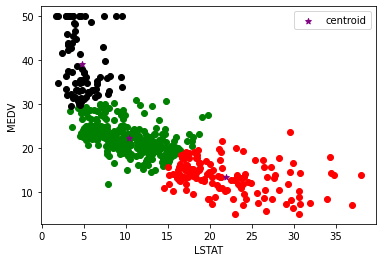

In [480]:
# Plot clusters and centroids
housing_df1 = housing_df[housing_df.cluster==0]
housing_df2 = housing_df[housing_df.cluster==1]
housing_df3 = housing_df[housing_df.cluster==2]

plt.scatter(housing_df1.LSTAT, housing_df1['MEDV'], color='green')
plt.scatter(housing_df2.LSTAT, housing_df2['MEDV'], color='red')
plt.scatter(housing_df3.LSTAT, housing_df3['MEDV'], color='black')

# Plot centers
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend()

You can see the clustering we got in the plot above. You can see the centroid for each clusters which is marked with the symbol '*'. Now, I am doing data preprocessing by using the MinMaxScaler function to get the scatter plot starting with base zero. Minmax scalar will convert the features between the range zero and one. Here, actually we don't need to do MinMaxScaler, since the base of the scatterplot already starts with zero.

# Data Preprocessing

In [481]:
# transform Variables LSTAT and MEDV on MinMax Scale

scaler = MinMaxScaler()

scaler.fit(housing_df[['LSTAT']])
housing_df['LSTAT'] = scaler.transform(housing_df[['LSTAT']])

# transform Age
scaler.fit(housing_df[['MEDV']])
housing_df['MEDV'] = scaler.transform(housing_df[['MEDV']])
housing_df.head()

data_X = housing_df.iloc[:,[12, 13]].values

Text(0, 0.5, 'MEDV')

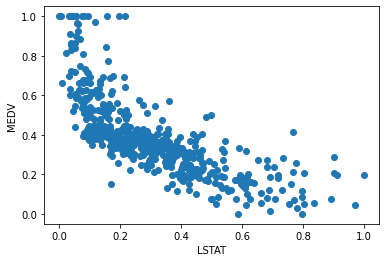

In [482]:
# Plot after data preprocessing
plt.scatter(housing_df['LSTAT'], housing_df['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

At above figure, we can see the scatterplot after Minmax scaling. Now, I am going to do K-Means clustering with the preprocessed data.

In [483]:
# Run same K-means algorithm after data preprocessing
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data_X)
y_predicted

array([0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0,
       0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [484]:
housing_df['cluster'] = y_predicted
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,cluster
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,0.089680,0.422222,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,0.204470,0.368889,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,0.063466,0.660000,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,0.033389,0.631111,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,0.099338,0.693333,1


In [485]:
# Get the cluster centers
km.cluster_centers_

array([[0.2419428 , 0.37833926],
       [0.08618152, 0.74257982],
       [0.55818297, 0.19006441]])

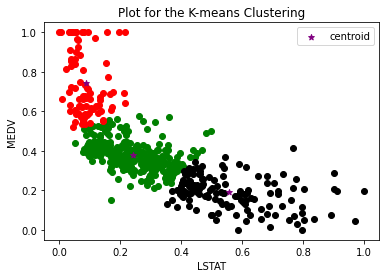

In [486]:
# Plot final clusters and centroids after preprocessing
housing_df1 = housing_df[housing_df.cluster==0]
housing_df2 = housing_df[housing_df.cluster==1]
housing_df3 = housing_df[housing_df.cluster==2]

plt.scatter(housing_df1.LSTAT, housing_df1['MEDV'], color='green')
plt.scatter(housing_df2.LSTAT, housing_df2['MEDV'], color='red')
plt.scatter(housing_df3.LSTAT, housing_df3['MEDV'], color='black')

# Plot centers
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.title("Plot for the K-means Clustering")
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend()

In the above figure, we can see the scatterplot after Minmax scaling. Now, I am going to do K-Means clustering with the preprocessed data.

# Evaluation of the K-means Clustering Model

Here, I am going to evaluate the K-means Clustering model with the Silhouette Coefficient. Evaluation with the Adjusted Rand Index (ARI) is not possible, since the dataset does not contains ground truth labels.

In [487]:
# Calculate Silhouette Coefficient for our model
silhouette_coefficient = silhouette_score(data_X, y_predicted)
print("Silhouette score for the K-means Clustering model with 3 clusters is", silhouette_coefficient)

Silhouette score for the K-means Clustering model with 3 clusters is 0.48647781810574786


Here, I got the Silhouette score of 0.48647781810574786 for the K-means Clustering with 3 clusters. Now, I am going to check the Silhouette score of the K-means Clustering model with k value ranging from 2 to 10.

In [488]:
# Calculate Silhouette Coefficient by number of clusters from 2 to 10
silhouette_coefficients = []

k_range = range(2, 11)
for k in k_range:
    km = KMeans(n_clusters=k)
    y_predicted = km.fit_predict(data_X)
    silhouette_coefficient = silhouette_score(data_X, y_predicted)
    silhouette_coefficients.append(silhouette_coefficient)
    print("Silhouette score for the K-means with", k, "cluster is", silhouette_coefficient)   

Silhouette score for the K-means with 2 cluster is 0.45342567290923286
Silhouette score for the K-means with 3 cluster is 0.48647781810574786
Silhouette score for the K-means with 4 cluster is 0.4410670915413514
Silhouette score for the K-means with 5 cluster is 0.4448113097076989
Silhouette score for the K-means with 6 cluster is 0.41943759293845695
Silhouette score for the K-means with 7 cluster is 0.3988937582055294
Silhouette score for the K-means with 8 cluster is 0.3739538535550476
Silhouette score for the K-means with 9 cluster is 0.38598656165195205
Silhouette score for the K-means with 10 cluster is 0.36789062484862295


After checking the results of the Silhouette score for the K-means Clustering model with k value ranging from 2 to 10, we can see that K-means with number of clusters 3 has the best Silhouette score. With the Elbow plot also, we got the best value of the number of clusters as 3. Now, I am plotting the scatter plot of the Silhouette Coefficient with Number of Clusters to get the graphical representation of the results we got.

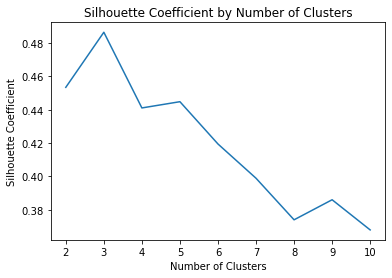

In [489]:
#Plot the Silhouette Coefficients by Number of Clusters

plt.plot(k_range, silhouette_coefficients)
plt.xticks(k_range)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Coefficient by Number of Clusters")
plt.show()

# DBSCAN

Initially, I am going to find out the best value of Epsilon and Minimum number of points for the DBSCAN

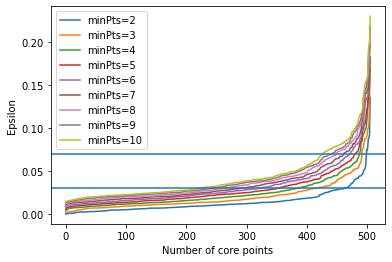

In [490]:
# Import libraries
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from numpy import unique, where

# Find the appropriate Epsilon value
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(data_X)
distances, indices = nbrs.kneighbors(data_X)
for k in range(1, 10):
    distances_k = np.sort(distances[:,k], axis=0)
    plt.plot(distances_k, label='minPts=%i' % (k+1))
    
plt.ylabel('Epsilon')
plt.xlabel('Number of core points')
plt.axhline(0.03)
plt.axhline(0.07)
plt.legend()
plt.show()

From the plot above, we can see that the Epsilon value is ranging from 0.03 to 0.07 for Minimum points ranging from 2 to 10. Here, I am running the DBSCAN clustering model with Epsilon value 0.04 and Minimum Samples 5.

In [491]:
# Define the model with Epsilon value and minimum samples
model = DBSCAN(eps=0.04, min_samples=5)

# Fit model and predict clusters
y_predicted = model.fit_predict(data_X)
y_predicted

array([ 0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1, -1, -1, -1,  0, -1, -1,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  2,  2,  2,  0,  0,  2,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1, -1,  2,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  1,  2,
        2,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  1,  2

In [492]:
# retrieve unique clusters
clusters = unique(y_predicted)
clusters

array([-1,  0,  1,  2,  3,  4], dtype=int64)

After running the DBSCAN clustering model, I got 5 different clusters ranging from 0 to 4. The value -1 is the outliers. Now, I am plotting the clusters we got in the scatter plot.

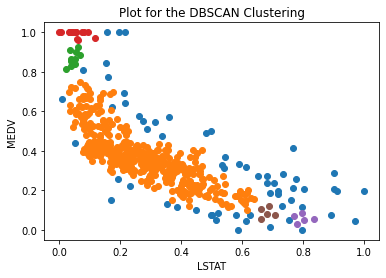

In [493]:
# Plot the result

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(y_predicted == cluster)
    # create scatter of these samples
    plt.scatter(data_X[row_ix, 0], data_X[row_ix, 1], cmap='Set1')
    plt.title("Plot for the DBSCAN Clustering")
    plt.xlabel('LSTAT')
    plt.ylabel('MEDV')

plt.show()

You can see the clustering we got in 6 different colors in the above plot. The blue colored datapoints in the plot is the outliers.

# Evaluation of the DBSCAN Clustering

Here, I am going to evaluate the DBSCAN Clustering model with the Silhouette Coefficient. Evaluation with the Adjusted Rand Index (ARI) is not possible, since the dataset does not contain ground truth labels.

In [494]:
# Calculate Silhouette Coefficient for our model
silhouette_coefficient = silhouette_score(data_X, y_predicted)
print("Silhouette score for the DBSCAN Clustering model is", silhouette_coefficient)

Silhouette score for the DBSCAN Clustering model is 0.21353319444691157


Here, I got the Silhouette score of 0.21353319444691157 for the DBSCAN Clustering with Epsilon value 0.04 and Minimum Samples 5. Now, I am going to check the Silhouette score of DBSCAN Clustering model with the Epsilon value ranging from 0.01 to 0.1 and minimum samples ranging from 2 to 5.

In [495]:
# Calculate Silhouette Coefficient by epsilon and minimum samples
epsilon_range = np.arange(0.01, 0.11, 0.01)
min_samples_range = range(2, 6)

for i in min_samples_range:
    for j in epsilon_range:
        model = DBSCAN(eps=j, min_samples=i)        
        y_predicted = model.fit_predict(data_X)
        silhouette_coefficient = silhouette_score(data_X, y_predicted)
        print("Silhouette Coefficient is", silhouette_coefficient, "when min sample is", i, "and epsilon is", round(j, 2))

Silhouette Coefficient is -0.17272945109336305 when min sample is 2 and epsilon is 0.01
Silhouette Coefficient is -0.20407959672138906 when min sample is 2 and epsilon is 0.02
Silhouette Coefficient is -0.2106741699301475 when min sample is 2 and epsilon is 0.03
Silhouette Coefficient is -0.13128955037193735 when min sample is 2 and epsilon is 0.04
Silhouette Coefficient is -0.09245932588890164 when min sample is 2 and epsilon is 0.05
Silhouette Coefficient is 0.013568067592145398 when min sample is 2 and epsilon is 0.06
Silhouette Coefficient is 0.011191570942649906 when min sample is 2 and epsilon is 0.07
Silhouette Coefficient is 0.015534612919506688 when min sample is 2 and epsilon is 0.08
Silhouette Coefficient is 0.2271988449726874 when min sample is 2 and epsilon is 0.09
Silhouette Coefficient is 0.32895064406128516 when min sample is 2 and epsilon is 0.1
Silhouette Coefficient is -0.34009595045177643 when min sample is 3 and epsilon is 0.01
Silhouette Coefficient is -0.22455369

Here, you can see the results of Silhouette Coefficient of DBSCAN Clustering model with Epsilon value ranging from 0.01 to 0.1 and minimum samples ranging from 2 to 5.

# Hierarchical Clustering

Initially, I am plotting the dendrogram for our model

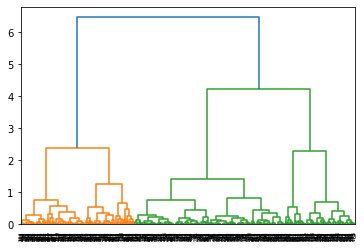

In [496]:
# Import Libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

#Create linkage
z = linkage(data_X, method = 'ward')

# Create a dendrogram
whole_dendrogram = dendrogram(z)

Since the dendrogram we got is not readable, I am going to truncate the dendrogram.

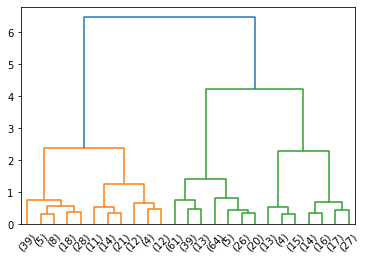

In [497]:
# Created truncated dendrogram with truncate_mode='lastp' and p=25
truncated_dendrogram = dendrogram(z, truncate_mode='lastp', p=25)

We can see the truncated dendrogram above. Now, I am going to run the Hierarchical Clustering Model with number of clusters 3, affinity 'euclidean' and linkage 'average'.

In [498]:
# Created the Hierarchical Clustering Model
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')

# Fit model and predict clusters
y_predicted = hc.fit_predict(data_X)
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [499]:
# retrieve unique clusters
clusters = unique(y_predicted)
clusters

array([0, 1, 2], dtype=int64)

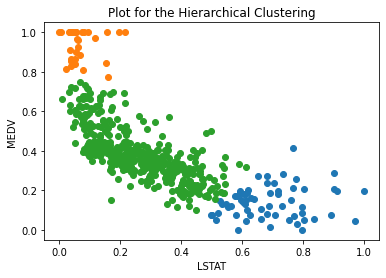

In [500]:
# Plot the result

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(y_predicted == cluster)
    # create scatter of these samples
    plt.scatter(data_X[row_ix, 0], data_X[row_ix, 1], cmap='Set1')
    plt.xlabel('LSTAT')
    plt.ylabel('MEDV')
    plt.title("Plot for the Hierarchical Clustering")
plt.show()


# Evaluation of the Hierarchical Clustering

Here, I am going to evaluate the Hierarchical Clustering model with the Silhouette Coefficient. Evaluation with the Adjusted Rand Index (ARI) is not possible, since the dataset does not contain ground truth labels.

In [501]:
# Calculate Silhouette Coefficient for our model
silhouette_coefficient = silhouette_score(data_X, y_predicted)
print("Silhouette score for the Hierarchical Clustering model is", silhouette_coefficient)

Silhouette score for the Hierarchical Clustering model is 0.4512995072139168


Here, I got the Silhouette score of 0.4512995072139168 for the Hierarchical Clustering with number of clusters 3, affinity 'euclidean' and linkage 'average'. Now, I am going to check the Silhouette score of the Hierarchical Clustering model with the number of clusters ranging from 2 to 10 and linkage 'ward'. Then, with the number of clusters ranging from 2 to 10 and linkage 'complete'. Then, with the number of clusters ranging from 2 to 10 and linkage 'average'.

In [502]:
# Calculate Silhouette Coefficient by number of clusters from 2 to 10 with linkage = 'ward'
silhouette_coefficients = []

cluster_range = range(2, 11)
for k in cluster_range:
    hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    y_predicted = hc.fit_predict(data_X)
    silhouette_coefficient = silhouette_score(data_X, y_predicted)
    silhouette_coefficients.append(silhouette_coefficient)
    print("Silhouette score for the Hierarchical Clustering with linkage 'ward' and", k, "cluster is", silhouette_coefficient)

Silhouette score for the Hierarchical Clustering with linkage 'ward' and 2 cluster is 0.4630098783463652
Silhouette score for the Hierarchical Clustering with linkage 'ward' and 3 cluster is 0.44702482087882645
Silhouette score for the Hierarchical Clustering with linkage 'ward' and 4 cluster is 0.40077717222550413
Silhouette score for the Hierarchical Clustering with linkage 'ward' and 5 cluster is 0.4070434293596099
Silhouette score for the Hierarchical Clustering with linkage 'ward' and 6 cluster is 0.36549685676014704
Silhouette score for the Hierarchical Clustering with linkage 'ward' and 7 cluster is 0.3632030405502081
Silhouette score for the Hierarchical Clustering with linkage 'ward' and 8 cluster is 0.3575277643899978
Silhouette score for the Hierarchical Clustering with linkage 'ward' and 9 cluster is 0.3454146527164183
Silhouette score for the Hierarchical Clustering with linkage 'ward' and 10 cluster is 0.3630847000190194


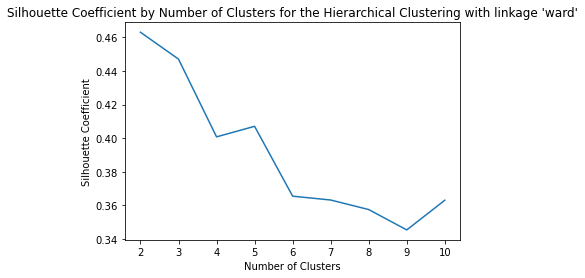

In [503]:
#Plot the Silhouette Coefficients by Number of Clusters with linkage = 'ward'

plt.plot(cluster_range, silhouette_coefficients)
plt.xticks(cluster_range)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Coefficient by Number of Clusters for the Hierarchical Clustering with linkage 'ward'")
plt.show()

In [504]:
# Calculate Silhouette Coefficient by number of clusters from 2 to 10 with linkage = 'complete'
silhouette_coefficients = []

cluster_range = range(2, 11)
for k in cluster_range:
    hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
    y_predicted = hc.fit_predict(data_X)
    silhouette_coefficient = silhouette_score(data_X, y_predicted)
    silhouette_coefficients.append(silhouette_coefficient)
    print("Silhouette score for the Hierarchical Clustering with linkage 'complete' and", k, "cluster is", silhouette_coefficient)

Silhouette score for the Hierarchical Clustering with linkage 'complete' and 2 cluster is 0.48367057475783903
Silhouette score for the Hierarchical Clustering with linkage 'complete' and 3 cluster is 0.4314450694534168
Silhouette score for the Hierarchical Clustering with linkage 'complete' and 4 cluster is 0.4356439797944815
Silhouette score for the Hierarchical Clustering with linkage 'complete' and 5 cluster is 0.42652839773993484
Silhouette score for the Hierarchical Clustering with linkage 'complete' and 6 cluster is 0.38387371024971384
Silhouette score for the Hierarchical Clustering with linkage 'complete' and 7 cluster is 0.3021351017979879
Silhouette score for the Hierarchical Clustering with linkage 'complete' and 8 cluster is 0.2996712643201942
Silhouette score for the Hierarchical Clustering with linkage 'complete' and 9 cluster is 0.2903563279458599
Silhouette score for the Hierarchical Clustering with linkage 'complete' and 10 cluster is 0.2936939047413564


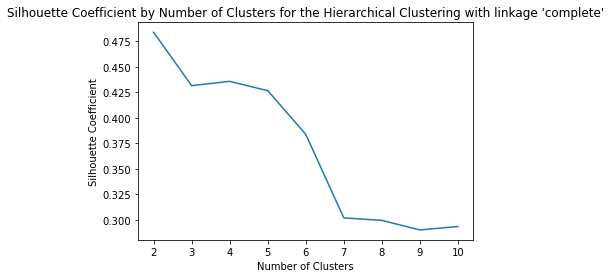

In [505]:
#Plot the Silhouette Coefficients by Number of Clusters with linkage = 'complete'

plt.plot(cluster_range, silhouette_coefficients)
plt.xticks(cluster_range)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Coefficient by Number of Clusters for the Hierarchical Clustering with linkage 'complete'")
plt.show()

In [506]:
# Calculate Silhouette Coefficient by number of clusters from 2 to 10 with linkage = 'average'
silhouette_coefficients = []

cluster_range = range(2, 11)
for k in cluster_range:
    hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
    y_predicted = hc.fit_predict(data_X)
    silhouette_coefficient = silhouette_score(data_X, y_predicted)
    silhouette_coefficients.append(silhouette_coefficient)
    print("Silhouette score for the Hierarchical Clustering with linkage 'average' and", k, "cluster is", silhouette_coefficient)

Silhouette score for the Hierarchical Clustering with linkage 'average' and 2 cluster is 0.5314317904458501
Silhouette score for the Hierarchical Clustering with linkage 'average' and 3 cluster is 0.4512995072139168
Silhouette score for the Hierarchical Clustering with linkage 'average' and 4 cluster is 0.41691328054200943
Silhouette score for the Hierarchical Clustering with linkage 'average' and 5 cluster is 0.41411737630430046
Silhouette score for the Hierarchical Clustering with linkage 'average' and 6 cluster is 0.4133595527544841
Silhouette score for the Hierarchical Clustering with linkage 'average' and 7 cluster is 0.39888019200442054
Silhouette score for the Hierarchical Clustering with linkage 'average' and 8 cluster is 0.3825046011876069
Silhouette score for the Hierarchical Clustering with linkage 'average' and 9 cluster is 0.33867206717908027
Silhouette score for the Hierarchical Clustering with linkage 'average' and 10 cluster is 0.33859466161669555


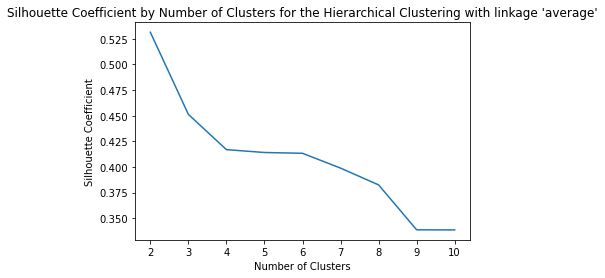

In [507]:
#Plot the Silhouette Coefficients by Number of Clusters with linkage = 'average'

plt.plot(cluster_range, silhouette_coefficients)
plt.xticks(cluster_range)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Coefficient by Number of Clusters for the Hierarchical Clustering with linkage 'average'")
plt.show()

After checking the results of Silhouette score for the Hierarchical Clustering models, we can see that Hierarchical Clustering with number of clusters 2 and linkage 'average' has the best Silhouette score.

# BIRCH Clustering

Here, I am going to run the BIRCH Clustering Model with branching factor 50, number of clusters 3 and threshold 0.1.

In [508]:
# Import libraries
from sklearn.cluster import Birch

# Created the BIRCH Clustering Model
brc = Birch(branching_factor = 50, n_clusters = 3, threshold = 0.1)

# Fit model and predict clusters
y_predicted = brc.fit_predict(data_X)
y_predicted

array([2, 2, 1, 1, 1, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2,

In [509]:
# retrieve unique clusters
clusters = unique(y_predicted)
clusters 

array([0, 1, 2], dtype=int64)

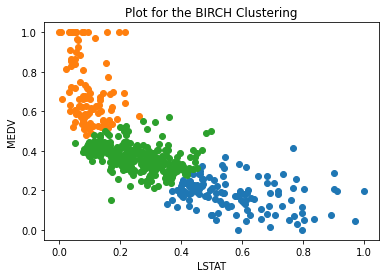

In [510]:
# Plot the result

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(y_predicted == cluster)
    # create scatter of these samples
    plt.scatter(data_X[row_ix, 0], data_X[row_ix, 1], cmap='Set1')
    plt.title("Plot for the BIRCH Clustering")
    plt.xlabel('LSTAT')
    plt.ylabel('MEDV')

plt.show()

# Evaluation of the BIRCH Clustering Model

Here, I am going to evaluate the BIRCH Clustering model with the Silhouette Coefficient. Evaluation with the Adjusted Rand Index (ARI) is not possible, since the dataset does not contain ground truth labels.

In [511]:
# Calculate Silhouette Coefficient for our model
silhouette_coefficient = silhouette_score(data_X, y_predicted)
print("Silhouette score for the BIRCH Clustering model is", silhouette_coefficient)

Silhouette score for the BIRCH Clustering model is 0.4791155085454977


Here, I got the Silhouette score of 0.4791155085454977 for the BIRCH Clustering with branching factor 50, number of clusters 3 and threshold 0.1. Now, I am going to check the Silhouette score of BIRCH Clustering model with branching factor ranging from 10 to 100 and number of clusters ranging from 2 to 10 and threshold ranging from 0.01 to 0.1.

In [512]:
# Calculate Silhouette Coefficient by number of clusters, branching factor and threshold
#brc = Birch(branching_factor = 50, n_clusters = 3, threshold = 0.1)

branching_factor_range = range(10, 101, 10)
threshold_range = np.arange(0.01, 0.11, 0.01)
no_of_clusters_range = range(2, 11)

for i in branching_factor_range:
    for j in threshold_range:
        for k in no_of_clusters_range:
            brc = Birch(branching_factor = i, n_clusters = k, threshold = j)            
            y_predicted = brc.fit_predict(data_X)
            silhouette_coefficient = silhouette_score(data_X, y_predicted)
            print("Silhouette Coefficient is", silhouette_coefficient, "when branching factor is", i, "threshold is", round(j, 2), "and number of clusters is", k)

Silhouette Coefficient is 0.4432803976673924 when branching factor is 10 threshold is 0.01 and number of clusters is 2
Silhouette Coefficient is 0.42823526511936894 when branching factor is 10 threshold is 0.01 and number of clusters is 3
Silhouette Coefficient is 0.43010379324326153 when branching factor is 10 threshold is 0.01 and number of clusters is 4
Silhouette Coefficient is 0.39621337704167636 when branching factor is 10 threshold is 0.01 and number of clusters is 5
Silhouette Coefficient is 0.3792736247955092 when branching factor is 10 threshold is 0.01 and number of clusters is 6
Silhouette Coefficient is 0.373160126397533 when branching factor is 10 threshold is 0.01 and number of clusters is 7
Silhouette Coefficient is 0.3449839484494109 when branching factor is 10 threshold is 0.01 and number of clusters is 8
Silhouette Coefficient is 0.3477524880903449 when branching factor is 10 threshold is 0.01 and number of clusters is 9
Silhouette Coefficient is 0.35237144087288863 

Silhouette Coefficient is 0.385702087950335 when branching factor is 10 threshold is 0.09 and number of clusters is 5
Silhouette Coefficient is 0.40772982611106856 when branching factor is 10 threshold is 0.09 and number of clusters is 6
Silhouette Coefficient is 0.3936531674895618 when branching factor is 10 threshold is 0.09 and number of clusters is 7
Silhouette Coefficient is 0.37729468449579984 when branching factor is 10 threshold is 0.09 and number of clusters is 8
Silhouette Coefficient is 0.37941858977991816 when branching factor is 10 threshold is 0.09 and number of clusters is 9
Silhouette Coefficient is 0.3833801956131422 when branching factor is 10 threshold is 0.09 and number of clusters is 10
Silhouette Coefficient is 0.4652507777463853 when branching factor is 10 threshold is 0.1 and number of clusters is 2
Silhouette Coefficient is 0.4791155085454977 when branching factor is 10 threshold is 0.1 and number of clusters is 3
Silhouette Coefficient is 0.44567563736843013 w

C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\cluster\_birch.py:717: ConvergenceWarning: Number of subclusters found (8) by BIRCH is less than (9). Decrease the threshold.
  warnings.warn(
C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\cluster\_birch.py:717: ConvergenceWarning: Number of subclusters found (8) by BIRCH is less than (10). Decrease the threshold.
  warnings.warn(


Silhouette Coefficient is 0.44148517138902676 when branching factor is 20 threshold is 0.01 and number of clusters is 4
Silhouette Coefficient is 0.3769376856253585 when branching factor is 20 threshold is 0.01 and number of clusters is 5
Silhouette Coefficient is 0.361702641415041 when branching factor is 20 threshold is 0.01 and number of clusters is 6
Silhouette Coefficient is 0.3623976847644656 when branching factor is 20 threshold is 0.01 and number of clusters is 7
Silhouette Coefficient is 0.3499219708532545 when branching factor is 20 threshold is 0.01 and number of clusters is 8
Silhouette Coefficient is 0.3538433729672547 when branching factor is 20 threshold is 0.01 and number of clusters is 9
Silhouette Coefficient is 0.36859901147140756 when branching factor is 20 threshold is 0.01 and number of clusters is 10
Silhouette Coefficient is 0.4433810565756696 when branching factor is 20 threshold is 0.02 and number of clusters is 2
Silhouette Coefficient is 0.3898526921119545 w

Silhouette Coefficient is 0.3760042333338133 when branching factor is 20 threshold is 0.09 and number of clusters is 5
Silhouette Coefficient is 0.38779805323082045 when branching factor is 20 threshold is 0.09 and number of clusters is 6
Silhouette Coefficient is 0.3342460700314448 when branching factor is 20 threshold is 0.09 and number of clusters is 7
Silhouette Coefficient is 0.3272529932618353 when branching factor is 20 threshold is 0.09 and number of clusters is 8
Silhouette Coefficient is 0.3327654033530485 when branching factor is 20 threshold is 0.09 and number of clusters is 9
Silhouette Coefficient is 0.39960305609757724 when branching factor is 20 threshold is 0.09 and number of clusters is 10
Silhouette Coefficient is 0.4652507777463853 when branching factor is 20 threshold is 0.1 and number of clusters is 2
Silhouette Coefficient is 0.4791155085454977 when branching factor is 20 threshold is 0.1 and number of clusters is 3
Silhouette Coefficient is 0.44567563736843013 w

C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\cluster\_birch.py:717: ConvergenceWarning: Number of subclusters found (8) by BIRCH is less than (9). Decrease the threshold.
  warnings.warn(
C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\cluster\_birch.py:717: ConvergenceWarning: Number of subclusters found (8) by BIRCH is less than (10). Decrease the threshold.
  warnings.warn(


Silhouette Coefficient is 0.35245860437413 when branching factor is 30 threshold is 0.01 and number of clusters is 6
Silhouette Coefficient is 0.323016691559003 when branching factor is 30 threshold is 0.01 and number of clusters is 7
Silhouette Coefficient is 0.3359297452815606 when branching factor is 30 threshold is 0.01 and number of clusters is 8
Silhouette Coefficient is 0.3224986800497415 when branching factor is 30 threshold is 0.01 and number of clusters is 9
Silhouette Coefficient is 0.32662584416686197 when branching factor is 30 threshold is 0.01 and number of clusters is 10
Silhouette Coefficient is 0.4603648607248675 when branching factor is 30 threshold is 0.02 and number of clusters is 2
Silhouette Coefficient is 0.48284485180188863 when branching factor is 30 threshold is 0.02 and number of clusters is 3
Silhouette Coefficient is 0.3971768880306537 when branching factor is 30 threshold is 0.02 and number of clusters is 4
Silhouette Coefficient is 0.36666037156150577 wh

Silhouette Coefficient is 0.3272529932618353 when branching factor is 30 threshold is 0.09 and number of clusters is 8
Silhouette Coefficient is 0.3327654033530485 when branching factor is 30 threshold is 0.09 and number of clusters is 9
Silhouette Coefficient is 0.39960305609757724 when branching factor is 30 threshold is 0.09 and number of clusters is 10
Silhouette Coefficient is 0.4652507777463853 when branching factor is 30 threshold is 0.1 and number of clusters is 2
Silhouette Coefficient is 0.4791155085454977 when branching factor is 30 threshold is 0.1 and number of clusters is 3
Silhouette Coefficient is 0.44567563736843013 when branching factor is 30 threshold is 0.1 and number of clusters is 4
Silhouette Coefficient is 0.42301766403508645 when branching factor is 30 threshold is 0.1 and number of clusters is 5
Silhouette Coefficient is 0.3869289520893859 when branching factor is 30 threshold is 0.1 and number of clusters is 6
Silhouette Coefficient is 0.41166105335309866 whe

C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\cluster\_birch.py:717: ConvergenceWarning: Number of subclusters found (8) by BIRCH is less than (9). Decrease the threshold.
  warnings.warn(
C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\cluster\_birch.py:717: ConvergenceWarning: Number of subclusters found (8) by BIRCH is less than (10). Decrease the threshold.
  warnings.warn(


Silhouette Coefficient is 0.41313176613178515 when branching factor is 30 threshold is 0.1 and number of clusters is 9
Silhouette Coefficient is 0.41313176613178515 when branching factor is 30 threshold is 0.1 and number of clusters is 10
Silhouette Coefficient is 0.46285096708186907 when branching factor is 40 threshold is 0.01 and number of clusters is 2
Silhouette Coefficient is 0.4667696678569588 when branching factor is 40 threshold is 0.01 and number of clusters is 3
Silhouette Coefficient is 0.4146774972201933 when branching factor is 40 threshold is 0.01 and number of clusters is 4
Silhouette Coefficient is 0.40835672054276645 when branching factor is 40 threshold is 0.01 and number of clusters is 5
Silhouette Coefficient is 0.3796372376397389 when branching factor is 40 threshold is 0.01 and number of clusters is 6
Silhouette Coefficient is 0.35800712368006815 when branching factor is 40 threshold is 0.01 and number of clusters is 7
Silhouette Coefficient is 0.3663632080283098

Silhouette Coefficient is 0.4657468895395402 when branching factor is 40 threshold is 0.09 and number of clusters is 3
Silhouette Coefficient is 0.4120917587595982 when branching factor is 40 threshold is 0.09 and number of clusters is 4
Silhouette Coefficient is 0.3760042333338133 when branching factor is 40 threshold is 0.09 and number of clusters is 5
Silhouette Coefficient is 0.38779805323082045 when branching factor is 40 threshold is 0.09 and number of clusters is 6
Silhouette Coefficient is 0.3342460700314448 when branching factor is 40 threshold is 0.09 and number of clusters is 7
Silhouette Coefficient is 0.3272529932618353 when branching factor is 40 threshold is 0.09 and number of clusters is 8
Silhouette Coefficient is 0.3327654033530485 when branching factor is 40 threshold is 0.09 and number of clusters is 9
Silhouette Coefficient is 0.39960305609757724 when branching factor is 40 threshold is 0.09 and number of clusters is 10
Silhouette Coefficient is 0.4652507777463853 

C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\cluster\_birch.py:717: ConvergenceWarning: Number of subclusters found (8) by BIRCH is less than (9). Decrease the threshold.
  warnings.warn(
C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\cluster\_birch.py:717: ConvergenceWarning: Number of subclusters found (8) by BIRCH is less than (10). Decrease the threshold.
  warnings.warn(


Silhouette Coefficient is 0.4545899784197846 when branching factor is 50 threshold is 0.01 and number of clusters is 3
Silhouette Coefficient is 0.4402665185064738 when branching factor is 50 threshold is 0.01 and number of clusters is 4
Silhouette Coefficient is 0.40931303953818426 when branching factor is 50 threshold is 0.01 and number of clusters is 5
Silhouette Coefficient is 0.4028035536085553 when branching factor is 50 threshold is 0.01 and number of clusters is 6
Silhouette Coefficient is 0.3965274542503403 when branching factor is 50 threshold is 0.01 and number of clusters is 7
Silhouette Coefficient is 0.36044650056094 when branching factor is 50 threshold is 0.01 and number of clusters is 8
Silhouette Coefficient is 0.36361838212431385 when branching factor is 50 threshold is 0.01 and number of clusters is 9
Silhouette Coefficient is 0.3485823861894134 when branching factor is 50 threshold is 0.01 and number of clusters is 10
Silhouette Coefficient is 0.4622979784148432 wh

Silhouette Coefficient is 0.4120917587595982 when branching factor is 50 threshold is 0.09 and number of clusters is 4
Silhouette Coefficient is 0.3760042333338133 when branching factor is 50 threshold is 0.09 and number of clusters is 5
Silhouette Coefficient is 0.38779805323082045 when branching factor is 50 threshold is 0.09 and number of clusters is 6
Silhouette Coefficient is 0.3342460700314448 when branching factor is 50 threshold is 0.09 and number of clusters is 7
Silhouette Coefficient is 0.3272529932618353 when branching factor is 50 threshold is 0.09 and number of clusters is 8
Silhouette Coefficient is 0.3327654033530485 when branching factor is 50 threshold is 0.09 and number of clusters is 9
Silhouette Coefficient is 0.39960305609757724 when branching factor is 50 threshold is 0.09 and number of clusters is 10
Silhouette Coefficient is 0.4652507777463853 when branching factor is 50 threshold is 0.1 and number of clusters is 2
Silhouette Coefficient is 0.4791155085454977 w

C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\cluster\_birch.py:717: ConvergenceWarning: Number of subclusters found (8) by BIRCH is less than (9). Decrease the threshold.
  warnings.warn(
C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\cluster\_birch.py:717: ConvergenceWarning: Number of subclusters found (8) by BIRCH is less than (10). Decrease the threshold.
  warnings.warn(


Silhouette Coefficient is 0.4627966516368887 when branching factor is 60 threshold is 0.01 and number of clusters is 2
Silhouette Coefficient is 0.45805998966008993 when branching factor is 60 threshold is 0.01 and number of clusters is 3
Silhouette Coefficient is 0.439058129372133 when branching factor is 60 threshold is 0.01 and number of clusters is 4
Silhouette Coefficient is 0.4069859656547052 when branching factor is 60 threshold is 0.01 and number of clusters is 5
Silhouette Coefficient is 0.3804083661567783 when branching factor is 60 threshold is 0.01 and number of clusters is 6
Silhouette Coefficient is 0.3625628836525389 when branching factor is 60 threshold is 0.01 and number of clusters is 7
Silhouette Coefficient is 0.34079364157856534 when branching factor is 60 threshold is 0.01 and number of clusters is 8
Silhouette Coefficient is 0.3159182289925683 when branching factor is 60 threshold is 0.01 and number of clusters is 9
Silhouette Coefficient is 0.3193973281696011 wh

Silhouette Coefficient is 0.38963912698212283 when branching factor is 60 threshold is 0.08 and number of clusters is 8
Silhouette Coefficient is 0.3537348675853838 when branching factor is 60 threshold is 0.08 and number of clusters is 9
Silhouette Coefficient is 0.33921664132375 when branching factor is 60 threshold is 0.08 and number of clusters is 10
Silhouette Coefficient is 0.46315149917964343 when branching factor is 60 threshold is 0.09 and number of clusters is 2
Silhouette Coefficient is 0.4657468895395402 when branching factor is 60 threshold is 0.09 and number of clusters is 3
Silhouette Coefficient is 0.4120917587595982 when branching factor is 60 threshold is 0.09 and number of clusters is 4
Silhouette Coefficient is 0.3760042333338133 when branching factor is 60 threshold is 0.09 and number of clusters is 5
Silhouette Coefficient is 0.38779805323082045 when branching factor is 60 threshold is 0.09 and number of clusters is 6
Silhouette Coefficient is 0.3342460700314448 w

C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\cluster\_birch.py:717: ConvergenceWarning: Number of subclusters found (8) by BIRCH is less than (9). Decrease the threshold.
  warnings.warn(
C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\cluster\_birch.py:717: ConvergenceWarning: Number of subclusters found (8) by BIRCH is less than (10). Decrease the threshold.
  warnings.warn(


Silhouette Coefficient is 0.41313176613178515 when branching factor is 60 threshold is 0.1 and number of clusters is 10
Silhouette Coefficient is 0.44696038702885477 when branching factor is 70 threshold is 0.01 and number of clusters is 2
Silhouette Coefficient is 0.3854042427626114 when branching factor is 70 threshold is 0.01 and number of clusters is 3
Silhouette Coefficient is 0.4335323568153217 when branching factor is 70 threshold is 0.01 and number of clusters is 4
Silhouette Coefficient is 0.42839412969303875 when branching factor is 70 threshold is 0.01 and number of clusters is 5
Silhouette Coefficient is 0.39802894340051037 when branching factor is 70 threshold is 0.01 and number of clusters is 6
Silhouette Coefficient is 0.4002152011316134 when branching factor is 70 threshold is 0.01 and number of clusters is 7
Silhouette Coefficient is 0.36348600091271277 when branching factor is 70 threshold is 0.01 and number of clusters is 8
Silhouette Coefficient is 0.366965100089745

Silhouette Coefficient is 0.38963912698212283 when branching factor is 70 threshold is 0.08 and number of clusters is 8
Silhouette Coefficient is 0.3537348675853838 when branching factor is 70 threshold is 0.08 and number of clusters is 9
Silhouette Coefficient is 0.33921664132375 when branching factor is 70 threshold is 0.08 and number of clusters is 10
Silhouette Coefficient is 0.46315149917964343 when branching factor is 70 threshold is 0.09 and number of clusters is 2
Silhouette Coefficient is 0.4657468895395402 when branching factor is 70 threshold is 0.09 and number of clusters is 3
Silhouette Coefficient is 0.4120917587595982 when branching factor is 70 threshold is 0.09 and number of clusters is 4
Silhouette Coefficient is 0.3760042333338133 when branching factor is 70 threshold is 0.09 and number of clusters is 5
Silhouette Coefficient is 0.38779805323082045 when branching factor is 70 threshold is 0.09 and number of clusters is 6
Silhouette Coefficient is 0.3342460700314448 w

C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\cluster\_birch.py:717: ConvergenceWarning: Number of subclusters found (8) by BIRCH is less than (9). Decrease the threshold.
  warnings.warn(
C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\cluster\_birch.py:717: ConvergenceWarning: Number of subclusters found (8) by BIRCH is less than (10). Decrease the threshold.
  warnings.warn(


Silhouette Coefficient is 0.39116328308145926 when branching factor is 80 threshold is 0.01 and number of clusters is 6
Silhouette Coefficient is 0.3481949573787496 when branching factor is 80 threshold is 0.01 and number of clusters is 7
Silhouette Coefficient is 0.34047801783602083 when branching factor is 80 threshold is 0.01 and number of clusters is 8
Silhouette Coefficient is 0.3420021131992055 when branching factor is 80 threshold is 0.01 and number of clusters is 9
Silhouette Coefficient is 0.34258592641708696 when branching factor is 80 threshold is 0.01 and number of clusters is 10
Silhouette Coefficient is 0.4622979784148432 when branching factor is 80 threshold is 0.02 and number of clusters is 2
Silhouette Coefficient is 0.48101825086460204 when branching factor is 80 threshold is 0.02 and number of clusters is 3
Silhouette Coefficient is 0.40637814833760283 when branching factor is 80 threshold is 0.02 and number of clusters is 4
Silhouette Coefficient is 0.35682585914505

Silhouette Coefficient is 0.3760042333338133 when branching factor is 80 threshold is 0.09 and number of clusters is 5
Silhouette Coefficient is 0.38779805323082045 when branching factor is 80 threshold is 0.09 and number of clusters is 6
Silhouette Coefficient is 0.3342460700314448 when branching factor is 80 threshold is 0.09 and number of clusters is 7
Silhouette Coefficient is 0.3272529932618353 when branching factor is 80 threshold is 0.09 and number of clusters is 8
Silhouette Coefficient is 0.3327654033530485 when branching factor is 80 threshold is 0.09 and number of clusters is 9
Silhouette Coefficient is 0.39960305609757724 when branching factor is 80 threshold is 0.09 and number of clusters is 10
Silhouette Coefficient is 0.4652507777463853 when branching factor is 80 threshold is 0.1 and number of clusters is 2
Silhouette Coefficient is 0.4791155085454977 when branching factor is 80 threshold is 0.1 and number of clusters is 3
Silhouette Coefficient is 0.44567563736843013 w

C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\cluster\_birch.py:717: ConvergenceWarning: Number of subclusters found (8) by BIRCH is less than (9). Decrease the threshold.
  warnings.warn(
C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\cluster\_birch.py:717: ConvergenceWarning: Number of subclusters found (8) by BIRCH is less than (10). Decrease the threshold.
  warnings.warn(


Silhouette Coefficient is 0.4211149091147486 when branching factor is 90 threshold is 0.01 and number of clusters is 5
Silhouette Coefficient is 0.38487952817486976 when branching factor is 90 threshold is 0.01 and number of clusters is 6
Silhouette Coefficient is 0.3646143693068651 when branching factor is 90 threshold is 0.01 and number of clusters is 7
Silhouette Coefficient is 0.36386836548587237 when branching factor is 90 threshold is 0.01 and number of clusters is 8
Silhouette Coefficient is 0.3673780345228224 when branching factor is 90 threshold is 0.01 and number of clusters is 9
Silhouette Coefficient is 0.348970603692528 when branching factor is 90 threshold is 0.01 and number of clusters is 10
Silhouette Coefficient is 0.4406732358425273 when branching factor is 90 threshold is 0.02 and number of clusters is 2
Silhouette Coefficient is 0.40070948916787386 when branching factor is 90 threshold is 0.02 and number of clusters is 3
Silhouette Coefficient is 0.39984290000997497

Silhouette Coefficient is 0.3760042333338133 when branching factor is 90 threshold is 0.09 and number of clusters is 5
Silhouette Coefficient is 0.38779805323082045 when branching factor is 90 threshold is 0.09 and number of clusters is 6
Silhouette Coefficient is 0.3342460700314448 when branching factor is 90 threshold is 0.09 and number of clusters is 7
Silhouette Coefficient is 0.3272529932618353 when branching factor is 90 threshold is 0.09 and number of clusters is 8
Silhouette Coefficient is 0.3327654033530485 when branching factor is 90 threshold is 0.09 and number of clusters is 9
Silhouette Coefficient is 0.39960305609757724 when branching factor is 90 threshold is 0.09 and number of clusters is 10
Silhouette Coefficient is 0.4652507777463853 when branching factor is 90 threshold is 0.1 and number of clusters is 2
Silhouette Coefficient is 0.4791155085454977 when branching factor is 90 threshold is 0.1 and number of clusters is 3
Silhouette Coefficient is 0.44567563736843013 w

C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\cluster\_birch.py:717: ConvergenceWarning: Number of subclusters found (8) by BIRCH is less than (9). Decrease the threshold.
  warnings.warn(
C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\cluster\_birch.py:717: ConvergenceWarning: Number of subclusters found (8) by BIRCH is less than (10). Decrease the threshold.
  warnings.warn(


Silhouette Coefficient is 0.4250172752724895 when branching factor is 100 threshold is 0.01 and number of clusters is 4
Silhouette Coefficient is 0.43718223838092696 when branching factor is 100 threshold is 0.01 and number of clusters is 5
Silhouette Coefficient is 0.39943725276305403 when branching factor is 100 threshold is 0.01 and number of clusters is 6
Silhouette Coefficient is 0.38675388470712424 when branching factor is 100 threshold is 0.01 and number of clusters is 7
Silhouette Coefficient is 0.35596621951798973 when branching factor is 100 threshold is 0.01 and number of clusters is 8
Silhouette Coefficient is 0.3699704049317307 when branching factor is 100 threshold is 0.01 and number of clusters is 9
Silhouette Coefficient is 0.37363211489275083 when branching factor is 100 threshold is 0.01 and number of clusters is 10
Silhouette Coefficient is 0.4406732358425273 when branching factor is 100 threshold is 0.02 and number of clusters is 2
Silhouette Coefficient is 0.400709

Silhouette Coefficient is 0.38779805323082045 when branching factor is 100 threshold is 0.09 and number of clusters is 6
Silhouette Coefficient is 0.3342460700314448 when branching factor is 100 threshold is 0.09 and number of clusters is 7
Silhouette Coefficient is 0.3272529932618353 when branching factor is 100 threshold is 0.09 and number of clusters is 8
Silhouette Coefficient is 0.3327654033530485 when branching factor is 100 threshold is 0.09 and number of clusters is 9
Silhouette Coefficient is 0.39960305609757724 when branching factor is 100 threshold is 0.09 and number of clusters is 10
Silhouette Coefficient is 0.4652507777463853 when branching factor is 100 threshold is 0.1 and number of clusters is 2
Silhouette Coefficient is 0.4791155085454977 when branching factor is 100 threshold is 0.1 and number of clusters is 3
Silhouette Coefficient is 0.44567563736843013 when branching factor is 100 threshold is 0.1 and number of clusters is 4
Silhouette Coefficient is 0.42301766403

C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\cluster\_birch.py:717: ConvergenceWarning: Number of subclusters found (8) by BIRCH is less than (9). Decrease the threshold.
  warnings.warn(
C:\Users\Sandeep\anaconda3\lib\site-packages\sklearn\cluster\_birch.py:717: ConvergenceWarning: Number of subclusters found (8) by BIRCH is less than (10). Decrease the threshold.
  warnings.warn(


Here, you can see the results of Silhouette Coefficient of BIRCH Clustering model with branching factor ranging from 10 to 100 and number of clusters ranging from 2 to 10 and threshold ranging from 0.01 to 0.1.